# Import modules and data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import *
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/MSDS 422/Assignment 6/train.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/MSDS 422/Assignment 6/test.csv')

In [ ]:
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (60000, 785)
Test data dimensions:  (5000, 785)


# Prepare data

In [ ]:
# Store target variable of training data in a safe place
label_train = df_train.label

# Concatenate training and test sets
data = pd.concat([df_train.drop(['label'], axis=1), df_test])

In [ ]:
# Return the first few rows of the dataset
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
count,65000.0,65000.0,65000.0,65000.0,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,...,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.0,65000.000000,65000.0,5000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.008138,0.027200,0.034862,0.073769,0.113446,0.195092,0.290677,0.276785,0.227554,0.137169,0.058677,0.024231,0.009615,0.004969,0.002200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004800,0.049738,0.154123,0.324785,0.798246,1.778662,2.931000,...,0.586738,0.509154,0.615185,0.435492,0.274046,0.110400,0.022446,0.006385,0.005062,0.003923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011769,0.071462,0.171431,0.258738,0.410323,0.459292,0.482692,0.475938,0.418708,0.296708,0.128954,0.070477,0.029123,0.023846,0.020831,0.026585,0.011277,0.001277,0.006554,0.0,0.002508,0.0,2499.500000
std,0.0,0.0,0.0,0.0,0.0,1.416435,2.594558,2.619430,3.949229,4.782459,6.203428,7.597353,7.307729,6.567234,5.186040,3.159226,2.219757,1.085557,0.901692,0.560892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.013976,3.364899,5.943111,8.297879,12.873214,19.092555,24.579321,...,10.474498,9.493496,11.385891,9.687298,7.797523,5.122547,2.258588,1.180767,0.943840,1.000192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.732357,4.169100,6.177646,7.341857,9.398769,9.930078,10.229071,10.094445,9.455375,7.793661,4.902623,3.487649,2.183458,2.314896,1.847182,2.273050,1.663053,0.325553,1.184052,0.0,0.639339,0.0,1443.520003
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1249.750000
50%,0.0,0.0,0.0,0.0,0.0,0.00

In [ ]:
# Concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 4999
Columns: 785 entries, pixel0 to id
dtypes: float64(1), int64(784)
memory usage: 389.8 MB


In [ ]:
# Return the number of missing values in each column

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data.drop(columns=['id']))

Your selected dataframe has 784 columns and 65000 Rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


In [ ]:
# Standardize Data
for i in data:
    if 'id' not in i:
        data[[i]] = data[[i]] / 255
        
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# Split data back into test and train datasets
data_train = data.iloc[:60000]
data_test = data.iloc[60000:]

In [ ]:
test_id = data_test['id']
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Split the data into train and validations sets by using train_test_split
from sklearn.model_selection import train_test_split

X = data_train.drop(["id"],axis= 1)
y = label_train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

# Explore data

## Plot a number

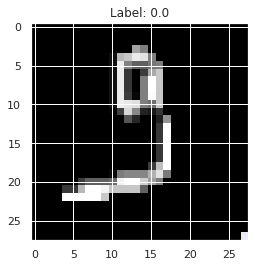

In [ ]:
# Plot a number
num = 12
plot_num = data_train.iloc[num, 1:]
plot_num = np.array(plot_num).reshape(28, -1)
plt.imshow(plot_num, cmap='gray')
plt.title(f'Label: {data_train.iloc[num, 0]}')
plt.show()

## Distribution of Label

[Text(0.5, 1.0, 'Distribution of Label')]

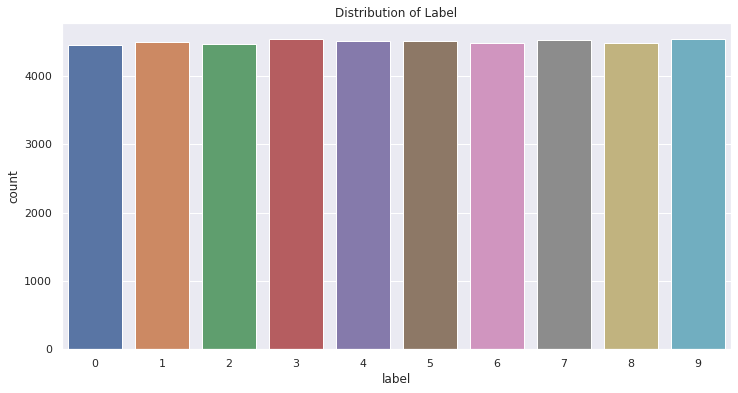

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y_train).set(title="Distribution of Label")

In [ ]:
#Check the frequency of each number
y_train.value_counts().sort_index()

0    4447
1    4502
2    4467
3    4533
4    4504
5    4511
6    4483
7    4522
8    4486
9    4545
Name: label, dtype: int64

# Build Models

## Neural Network

In [ ]:
from keras.utils.np_utils import to_categorical

from tensorflow.keras import layers, models
import time

In [ ]:
# Label encoding of target variable
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype='uint8')
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes = 10, dtype='uint8')

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_valid = X_valid.values.reshape(-1,28,28,1)

In [ ]:
names = ['Model 1',
         'Model 2',
         'Model 3',
         'Model 4']

layers_num = [10,10,13,13]
nodes_per_layer = [100,200,100,200]

In [ ]:
# Outline the model
model1 = models.Sequential()

model1.add(layers.Flatten(input_shape=[28, 28]))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(100, activation="relu"))
model1.add(layers.Dropout(0.2))

model1.add(layers.BatchNormalization())
model1.add(layers.Dense(100, activation="relu"))
model1.add(layers.Dropout(0.2))

model1.add(layers.BatchNormalization())
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(10, activation="softmax"))

In [ ]:
# Outline the model
model2 = models.Sequential()

model2.add(layers.Flatten(input_shape=[28, 28]))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(200, activation="relu"))
model2.add(layers.Dropout(0.2))

model2.add(layers.BatchNormalization())
model2.add(layers.Dense(200, activation="relu"))
model2.add(layers.Dropout(0.2))

model2.add(layers.BatchNormalization())
model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, activation="softmax"))

In [ ]:
# Outline the model
model3 = models.Sequential()

model3.add(layers.Flatten(input_shape=[28, 28]))
model3.add(layers.BatchNormalization())
model3.add(layers.Dense(100, activation="relu"))
model3.add(layers.Dropout(0.2))

model3.add(layers.BatchNormalization())
model3.add(layers.Dense(100, activation="relu"))
model3.add(layers.Dropout(0.2))

model3.add(layers.BatchNormalization())
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dropout(0.2))

model3.add(layers.BatchNormalization())
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(10, activation="softmax"))

In [ ]:
# Outline the model
model4 = models.Sequential()

model4.add(layers.Flatten(input_shape=[28, 28]))
model4.add(layers.BatchNormalization())
model4.add(layers.Dense(200, activation="relu"))
model4.add(layers.Dropout(0.2))

model4.add(layers.BatchNormalization())
model4.add(layers.Dense(200, activation="relu"))
model4.add(layers.Dropout(0.2))

model4.add(layers.BatchNormalization())
model4.add(layers.Dense(200, activation='relu'))
model4.add(layers.Dropout(0.2))

model4.add(layers.BatchNormalization())
model4.add(layers.Dense(200, activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(10, activation="softmax"))

In [ ]:
methods = [model1, model2, model3, model4]
index_for_method = 0 
training_performance_results = []
validation_performance_results = []
processing_time = []

In [ ]:
for name, method in zip(names, methods):
    print('\n------------------------------------')
    print('\nMethod:', name)
    print('\n  Specification of method:', method)
    start_time = time.clock()
    method.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    history = model1.fit(X_train, y_train, batch_size = 1000, epochs = 20, validation_data = (X_valid, y_valid), verbose = 2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time 
    print("\nProcessing time (seconds): %f" % runtime)        
    processing_time.append(runtime)

    # mean accuracy of prediction in training set
    training_performance = history.history['accuracy'][-1]
    print("\nTraining set accuracy: %f" % training_performance)
    training_performance_results.append(training_performance)

    # mean accuracy of prediction in validation set
    validation_performance = history.history['val_accuracy'][-1]
    print("\nValidation set accuracy: %f" % validation_performance)
    validation_performance_results.append(validation_performance)

    index_for_method += 1


------------------------------------

Method: Model 1

  Specification of method: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4ad44eb210>
Epoch 1/20
45/45 - 4s - loss: 0.9077 - accuracy: 0.7252 - val_loss: 0.6649 - val_accuracy: 0.9163
Epoch 2/20
45/45 - 0s - loss: 0.2311 - accuracy: 0.9313 - val_loss: 0.3219 - val_accuracy: 0.9337
Epoch 3/20
45/45 - 0s - loss: 0.1643 - accuracy: 0.9512 - val_loss: 0.2322 - val_accuracy: 0.9381
Epoch 4/20
45/45 - 0s - loss: 0.1328 - accuracy: 0.9602 - val_loss: 0.1779 - val_accuracy: 0.9483
Epoch 5/20
45/45 - 0s - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.1309 - val_accuracy: 0.9617
Epoch 6/20
45/45 - 0s - loss: 0.0951 - accuracy: 0.9717 - val_loss: 0.1051 - val_accuracy: 0.9677
Epoch 7/20
45/45 - 0s - loss: 0.0819 - accuracy: 0.9744 - val_loss: 0.0743 - val_accuracy: 0.9771
Epoch 8/20
45/45 - 0s - loss: 0.0739 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9800
Epoch 9/20
45/45 - 0s - loss: 0.0663 - accuracy: 0.97

In [ ]:
from collections import OrderedDict 
 
pd.set_option('display.max_columns', None)

results = pd.DataFrame(OrderedDict([('Method Name', names),
                        ('Layers', layers),
                        ('Nodes per Layer', nodes_per_layer),
                        ('Processing Time', processing_time),
                        ('Training Set Accuracy', training_performance_results),
                        ('Validation Set Accuracy', validation_performance_results)]))

print('\nBenchmark Experiment: Scikit Learn Artificial Neural Networks\n')
print(results) 


Benchmark Experiment: Scikit Learn Artificial Neural Networks

  Method Name                                             Layers  \
0     Model 1  <module 'tensorflow.keras.layers' from '/usr/l...   
1     Model 2  <module 'tensorflow.keras.layers' from '/usr/l...   
2     Model 3  <module 'tensorflow.keras.layers' from '/usr/l...   
3     Model 4  <module 'tensorflow.keras.layers' from '/usr/l...   

   Nodes per Layer  Processing Time  Training Set Accuracy  \
0              100         8.781570               0.992089   
1              200         6.900455               0.995889   
2              100         6.849258               0.997511   
3              200         6.836233               0.997822   

   Validation Set Accuracy  
0                 0.986267  
1                 0.987200  
2                 0.986333  
3                 0.987200  


# Test data

In [ ]:
X_test = data_test.drop(columns=['id']).values.reshape(-1,28,28,1)

'''predict results'''
results1 = model1.predict(X_test)
results2 = model2.predict(X_test)
results3 = model3.predict(X_test)
results4 = model4.predict(X_test)

'''select the indix with the maximum probability'''
results1 = np.argmax(results1,axis = 1)
results2 = np.argmax(results2,axis = 1)
results3 = np.argmax(results3,axis = 1)
results4 = np.argmax(results4,axis = 1)

In [ ]:
submission1 = pd.DataFrame(test_id)
submission1['label'] = results1
submission1.to_csv('submission1.csv',index=False)

submission2 = pd.DataFrame(test_id)
submission2['label'] = results2
submission2.to_csv('submission2.csv',index=False)

submission3 = pd.DataFrame(test_id)
submission3['label'] = results3
submission3.to_csv('submission3.csv',index=False)

submission4 = pd.DataFrame(test_id)
submission4['label'] = results4
submission4.to_csv('submission4.csv',index=False)

In [ ]:
from google.colab import files
files.download("submission1.csv")
files.download("submission2.csv")
files.download("submission3.csv")
files.download("submission4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle results

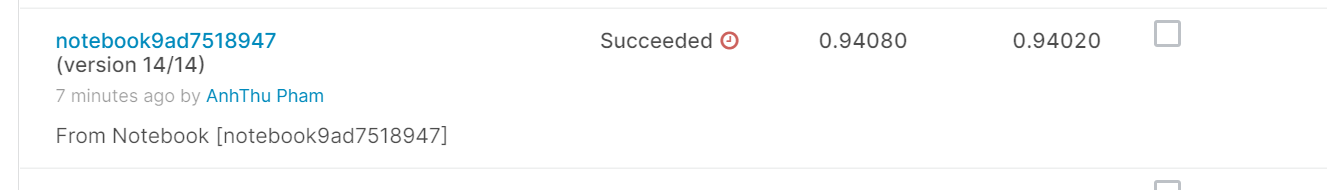

In [ ]:
from PIL import Image

# Kaggle Score - Model 1
path = "/content/drive/My Drive/MSDS 422/Assignment 6/model1_score.PNG"
img  = Image.open(path) 
img

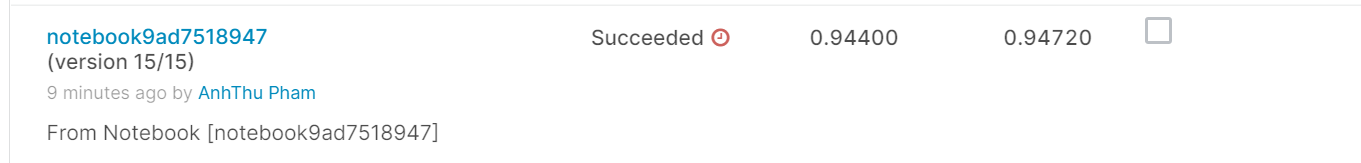

In [ ]:
# Kaggle Score - Model 2
path = "/content/drive/My Drive/MSDS 422/Assignment 6/model2_score.PNG"
img  = Image.open(path) 
img

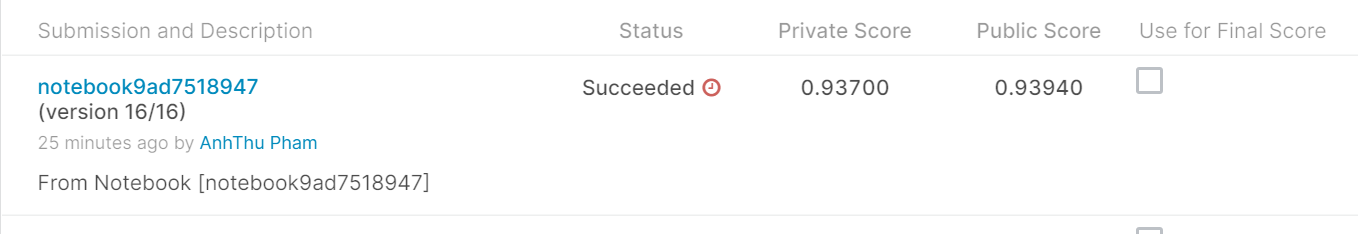

In [ ]:
# Kaggle Score - Model 3
path = "/content/drive/My Drive/MSDS 422/Assignment 6/model3_score.png"
img  = Image.open(path) 
img

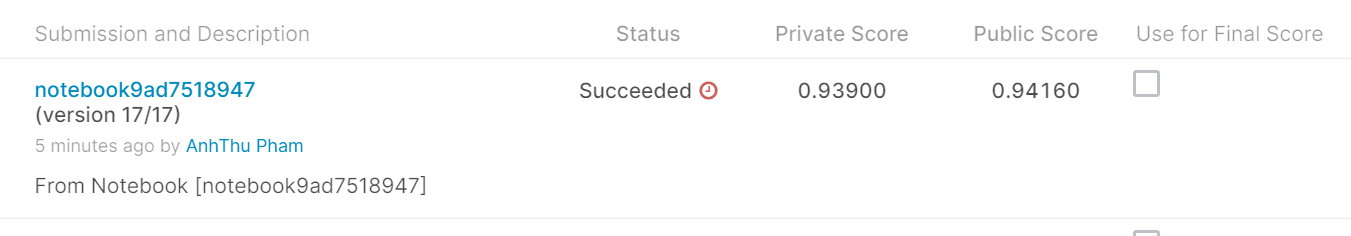

In [ ]:
# Kaggle Score - Model 4
path = "/content/drive/My Drive/MSDS 422/Assignment 6/model4_score.png"
img  = Image.open(path) 
img

# Exposition

The purpose of this project is to correctly identify digits from a dataset of more than sixty thousands of handwritten images. It utilizes neural network, which is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. There are 4 different models.

The 1st model has 10 layers and 100 nodes per inner layer. The training accuracy is 99.16%. The validation accuracy is 98.43%. The test accuracy is 94.02%.

The 2nd model has 10 layers and 200 nodes per inner layer. The training accuracy is 99.63%. The validation accuracy is 98.60%. The test accuracy is 94.72%.

The 3rd model has 13 layers and 100 nodes per inner layer. The training accuracy is 99.79%. The validation accuracy is 98.73%. The test accuracy is 93.94%.

The 4th model has 13 layers and 200 nodes per inner layer. The training accuracy is 99.83%. The validation accuracy is 98.80%. The test accuracy is 94.16%.